# **Computing Student Perfomance Analysis**

##Life cycle of Machine learning Project

*   Understanding the Problem Statement
*   Data Collection
*   Data Pre-Processing
*   Exploratory data analysis
*   Model Training
*   Choose best model

#**1. Problem Statement:**

  This project understands how the student's performance (online education) is affected by other variables such as Gender, Age, Education level, Institute Type, IT Student, Location, Load-Shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self, Lms, Device, Adaptivity level.

#**2. Data Collection**

*   **Data Source - https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education**
*   **The data consists of 14 columns and 1205 rows.**

**2.1 Import Data and Required Packages**

In [ ]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import the CSV Data as Pandas DataFrame**

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Kaggle X/students_adaptability_level_online_education.csv')

#Output the first five rows
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


**Shape of the Dataset**

In [ ]:
df.shape

(1205, 14)

#**3. Data Preprocessing/Data Cleaning**

*   Check Missing values
*   Check data type
*   Check the number of unique values of each column
*   Check statistics of data set
*   Check various categories present in the different categorical column
*   Remove unnecessary features.





**3.1 Check Missing Values**

In [ ]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

There are no missing values in the dataset.

**3.2 Check Data Types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


**3.3 Checking the Number of unique values of each column**

In [ ]:
df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

**3.4 Check Statistics of data set**

In [ ]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


#**4. Exploring Data**

In [ ]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
for i in df.columns:
    print(i, ":", df[i].unique().tolist())

Gender : ['Boy', 'Girl']
Age : ['21-25', '16-20', '11-15', '26-30', '6-10', '1-5']
Education Level : ['University', 'College', 'School']
Institution Type : ['Non Government', 'Government']
IT Student : ['No', 'Yes']
Location : ['Yes', 'No']
Load-shedding : ['Low', 'High']
Financial Condition : ['Mid', 'Poor', 'Rich']
Internet Type : ['Wifi', 'Mobile Data']
Network Type : ['4G', '3G', '2G']
Class Duration : ['3-6', '1-3', '0']
Self Lms : ['No', 'Yes']
Device : ['Tab', 'Mobile', 'Computer']
Adaptivity Level : ['Moderate', 'Low', 'High']


In [ ]:
# numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 14 categorical features : ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']


**4.1 Which Gender has high ratio level in students in percentage?**

<Axes: ylabel='Gender'>

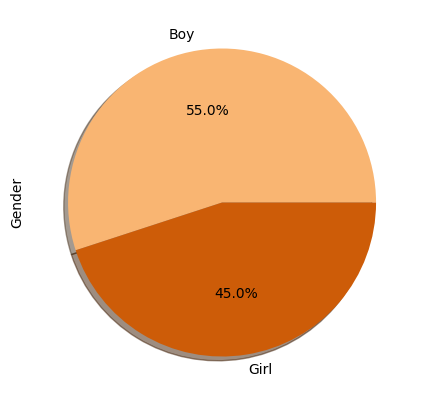

In [ ]:
plt.figure(figsize = (8,5))
colors = ['#f9b572','#cd5c08']
df['Gender'].value_counts('Adaptivity Level').plot.pie(colors = colors, autopct = '%1.1f%%',shadow = True)

**4.2 Which device is more reliable in using online education?**

<Axes: ylabel='Device'>

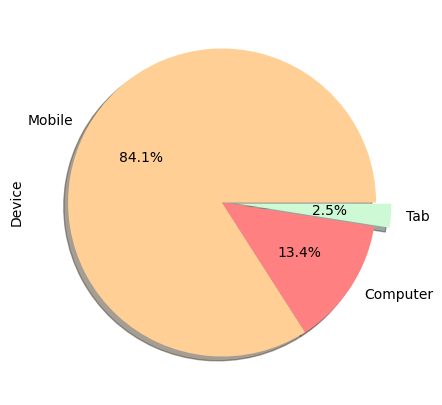

In [ ]:
plt.figure(figsize = (8,5))
colors = ('#FFCF96','#FF8080','#CDFAD5')
explode = [0,0,0.1]
df['Device'].value_counts().plot.pie(colors = colors, explode = explode,autopct = '%1.1f%%', shadow = True)

**4.3 Which device has more adaptability to take online education according to gender?**

In [ ]:
# Assuming df is your DataFrame
fig = px.sunburst(
    df,
    path=['Adaptivity Level', 'Device', 'Gender'],
    color_discrete_map={'Mid': 'blue', 'Other': 'red'},  # Modify as needed
)

# Set the title
fig.update_layout(title='Sunburst Chart for Adaptivity Level',title_x=0.5)

# Display the chart
fig.show()


**4.4 Which age group is more likely to take online education?**

<Figure size 640x480 with 0 Axes>

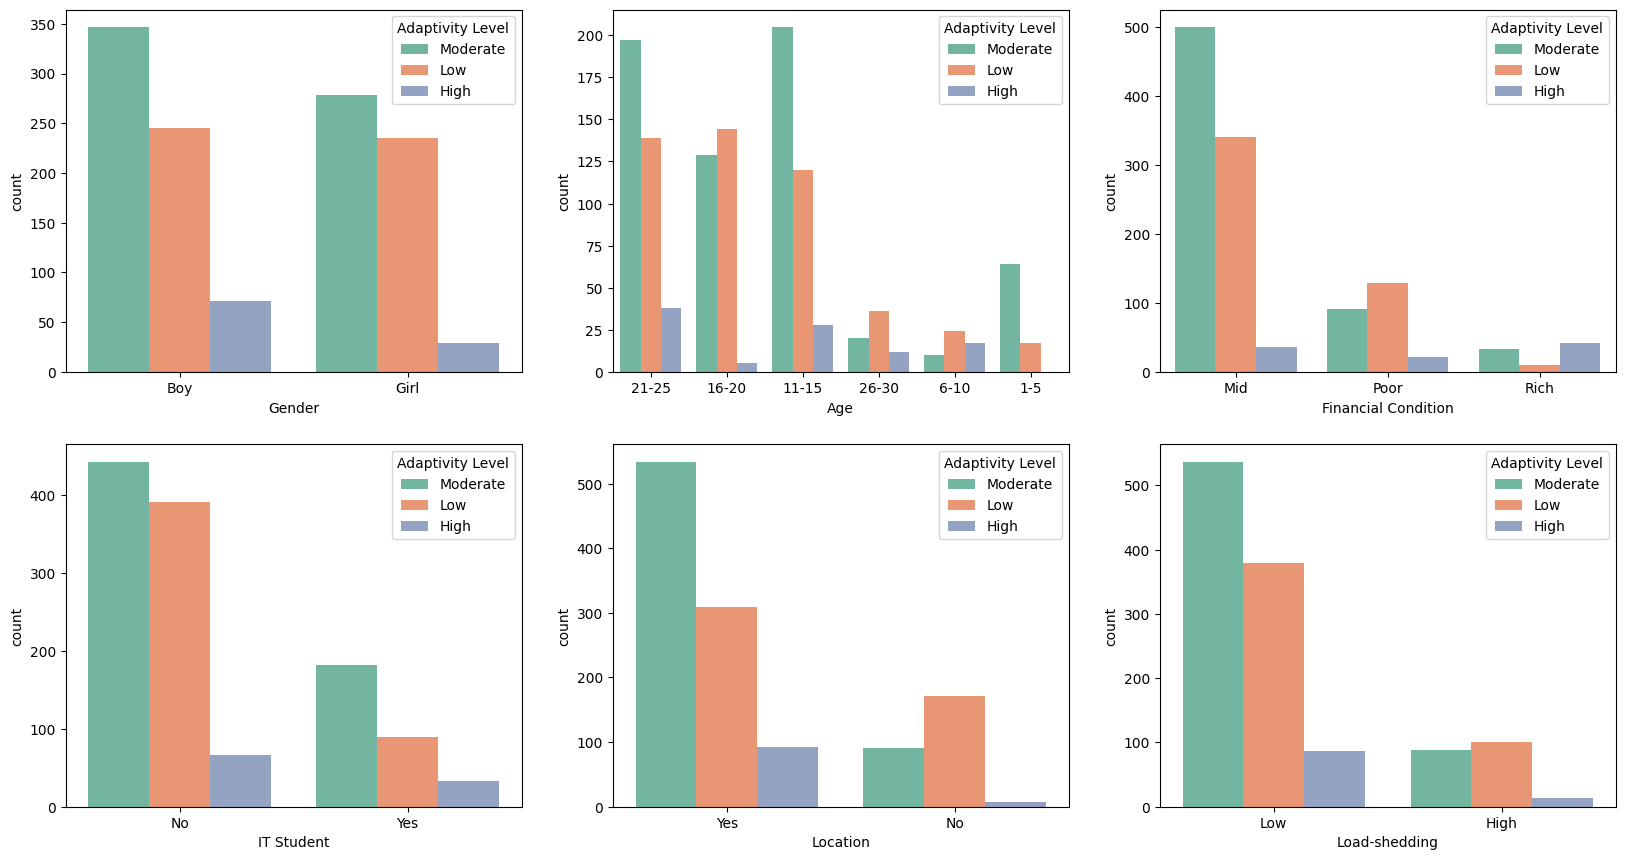

In [ ]:
plt.tight_layout()

UserProfile = ['Gender','Age','Financial Condition','IT Student','Location','Load-shedding']
plt.figure(figsize=(20,16))

for i, col in enumerate(UserProfile):
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Adaptivity Level", palette = sns.color_palette("Set2"))

**4.5 According to financial condition, how many students are there who are IT students?**

<Figure size 640x480 with 0 Axes>

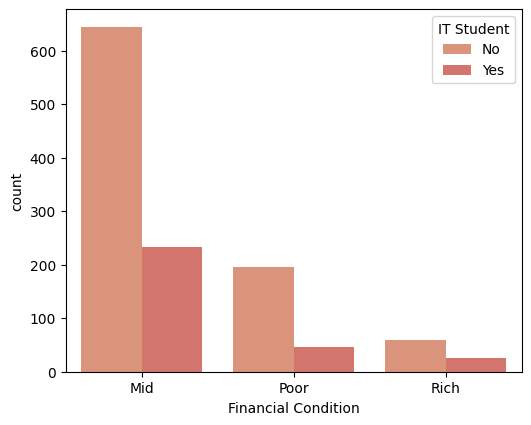

In [ ]:
plt.tight_layout()

UserProfile = ['Financial Condition']
plt.figure(figsize=(20,16))

for i, col in enumerate(UserProfile):
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "IT Student", palette = sns.color_palette("flare"))

**4.6 Among education level, which category has mostly low adaptivity level?**

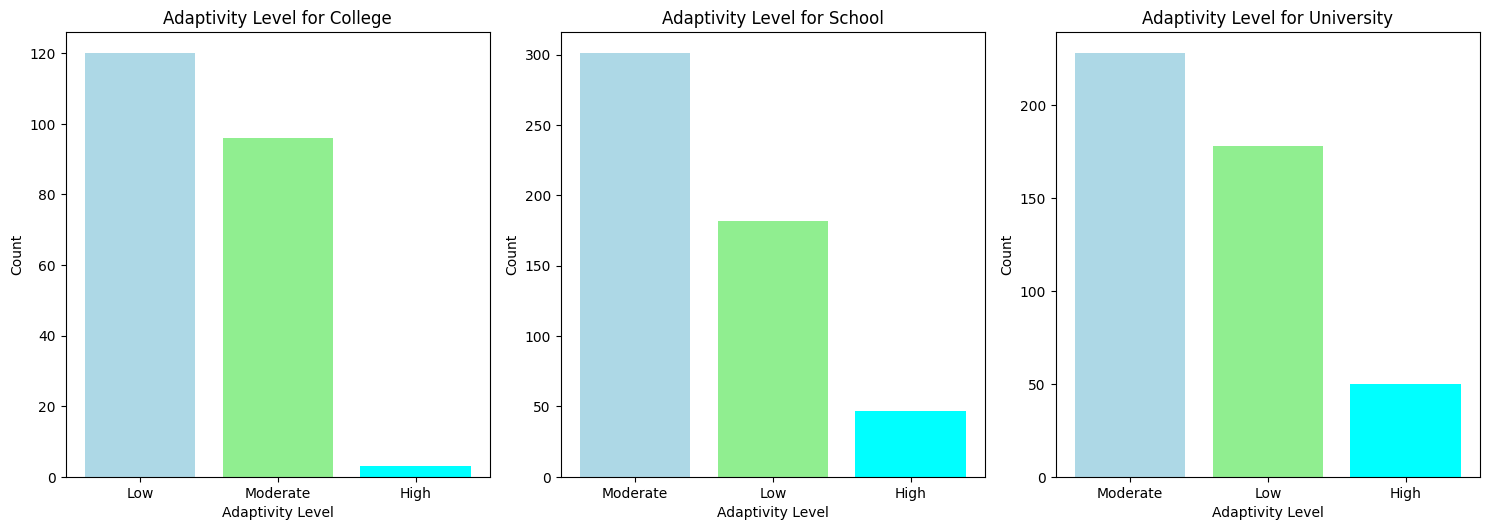

In [ ]:
graphs = 1
plt.figure(figsize=(15,10))
c = ['lightblue','lightgreen','cyan']
for i in np.unique(df["Education Level"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(df[df["Education Level"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count,color=c)
    plt.title("Adaptivity Level for " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

**4.7 Among financial condition, which category has mostly low adaptivity level?**

In [ ]:
# Get the column names excluding 'Adaptivity Level'
columns_to_plot = df.columns[df.columns != 'Adaptivity Level']

# Loop through the columns and create stacked bar charts
for column in columns_to_plot:
    fig = px.bar(df,x=column,
        color='Adaptivity Level',
        barmode="stack",
        title=f'{column}'
    )
    fig.show()


#**5. Feature Engineering**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00


In [ ]:
#Importing the basic librarires for building model - classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay

**Apply Label Encoder to change all datatype**

In [ ]:
# List of categorical columns
categorical_columns = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding',
                       'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataset after label encoding
print(df.head())

encoded_data = df.copy()
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(encoded_data[col].value_counts(), end="\n\n")

   Gender  Age  Education Level  Institution Type  IT Student  Location  \
0       0    3                2                 1           0         1   
1       1    3                2                 1           0         1   
2       1    2                0                 0           0         1   
3       1    1                1                 1           0         1   
4       1    2                1                 1           0         1   

   Load-shedding  Financial Condition  Internet Type  Network Type  \
0              1                    0              1             2   
1              0                    0              0             2   
2              1                    0              1             2   
3              1                    0              0             2   
4              1                    1              0             1   

   Class Duration  Self Lms  Device Adaptivity Level  
0               2         0       2         Moderate  
1               1 

In [ ]:
df['Adaptivity Level'] = df['Adaptivity Level'].map({'Moderate': 2, 'Low': 1, 'High': 0})

In [ ]:
X = df.drop(['Adaptivity Level'], axis=1)
y = df['Adaptivity Level']

#**6. Model Training and Evaluation**

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (964, 13)
X_test shape: (241, 13)
y_train shape: (964, 1)
y_test shape: (241, 1)


**Standardizing the data**

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

**Defining the classifier for classification**

**6.1 Logistic Regression**

Train Accuracy : 0.6929460580912863
Train Confusion Matrix:
[[ 35  17  25]
 [  4 217 156]
 [ 11  83 416]]


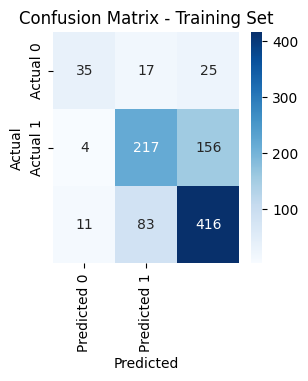

--------------------------------------------------
Test Accuracy : 0.6887966804979253
Test Confusion Matrix:
[[11  5  7]
 [ 1 57 45]
 [ 3 14 98]]


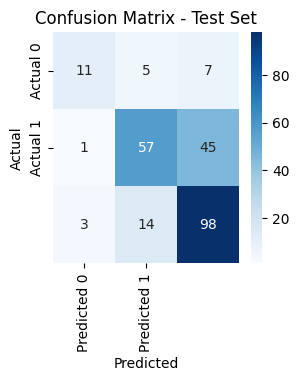

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred)

#check accuracy of training and testing
print("Train Accuracy :", accuracy_score(y_train, log_reg.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, log_reg.predict(X_train)))
#plot confusion matrix for training set
plt.figure(figsize=(3, 3))
cm_train = confusion_matrix(y_train, log_reg.predict(X_train))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

print("-"*50)

print("Test Accuracy :", accuracy_score(y_test, log_reg.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test,log_reg.predict(X_test)))
# Plot the Confusion Matrix for Test Set
plt.figure(figsize=(3, 3))
cm_test = confusion_matrix(y_test, log_reg.predict(X_test))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

**6.2 Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.93      0.92      0.93       103
           2       0.88      0.93      0.91       115

    accuracy                           0.90       241
   macro avg       0.88      0.83      0.86       241
weighted avg       0.90      0.90      0.90       241

Train Accuracy : 0.9346473029045643
Train Confusion Matrix:
[[ 62   0  15]
 [  3 359  15]
 [  3  27 480]]


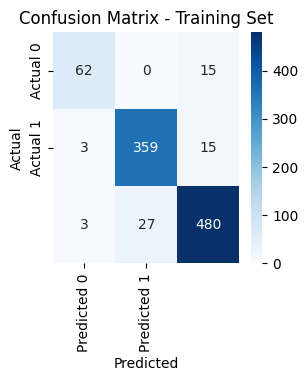

--------------------------------------------------
Test Accuracy : 0.8796680497925311
Test Confusion Matrix:
[[ 15   0   8]
 [  2  95   6]
 [  0  13 102]]


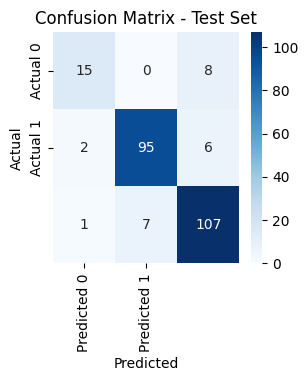

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.88      0.92      0.90       103
           2       0.88      0.89      0.88       115

    accuracy                           0.88       241
   macro avg       0.88      0.82      0.84       241
weighted avg       0.88      0.88      0.88       241



In [ ]:
# Initialize the classifier
dt = DecisionTreeClassifier()

# Fit the classifier
dt.fit(X_train, y_train.ravel())  # Removed .values

# Predict
pred = dt.predict(X_test)

# Print classification report
print(classification_report(y_test, pred, zero_division=1))

# Define the parameters for grid search
params = {
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 100, 5),
    'min_samples_split': range(2, 10),
    'criterion': ["gini", "entropy"],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt']
}

# Perform grid search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=0, scoring="accuracy", error_score='raise')

grid_search.fit(X_train, y_train.ravel())  # Removed .values

# Get the best estimator
dt_best = grid_search.best_estimator_


accuracy_dt_best = accuracy_score(y_test, y_pred)
# Function to evaluate the model
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    #plot confusion matrix for training set
    plt.figure(figsize=(3, 3))
    cm_train = confusion_matrix(y_train, dt.predict(X_train))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training Set')
    plt.show()

    print("-" * 50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    # Plot the Confusion Matrix for Test Set
    plt.figure(figsize=(3, 3))
    cm_test = confusion_matrix(y_test, dt.predict(X_test))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

# Evaluate the best model
evaluate_model(dt_best)

# Predict with the best model
pred = dt_best.predict(X_test)

# Print classification report
print(classification_report(y_test, pred, zero_division=1))


**6.3 Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.93      0.94      0.94       103
           2       0.90      0.94      0.92       115

    accuracy                           0.91       241
   macro avg       0.91      0.84      0.87       241
weighted avg       0.91      0.91      0.91       241

Training Accuracy (Random Forest): 0.9346


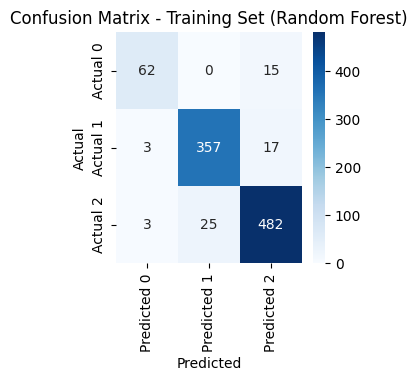

Testing Accuracy (Random Forest): 0.9129


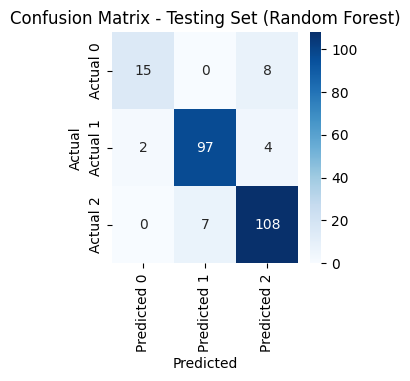

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Fit the classifier
rf_classifier.fit(X_train_stand, y_train)

# Predict
y_pred_rf = rf_classifier.predict(X_test_stand)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Calculate accuracy
# Calculate training accuracy
accuracy_train_rf = accuracy_score(y_train, rf_classifier.predict(X_train_stand))
print(f"Training Accuracy (Random Forest): {accuracy_train_rf:.4f}")

# Confusion Matrix for Training Set (Random Forest)
cm_train_rf = confusion_matrix(y_train, rf_classifier.predict(X_train_stand))
plt.figure(figsize=(3, 3))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set (Random Forest)')
plt.show()

# Confusion Matrix for Testing Set (Random Forest)
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Testing Accuracy (Random Forest): {accuracy_rf:.4f}")

cm_test_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set (Random Forest)')
plt.show()

**6.4 KNeighbors Classifier**

Train Accuracy: 0.8859
Test Accuracy: 0.7842


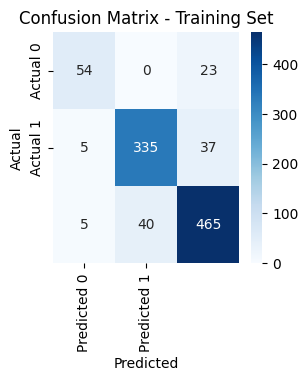

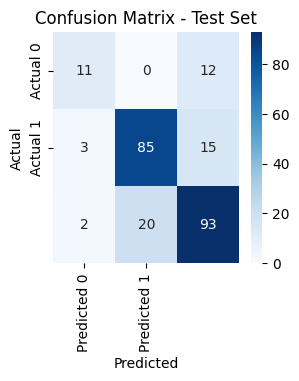

              precision    recall  f1-score   support

           0       0.69      0.48      0.56        23
           1       0.81      0.83      0.82       103
           2       0.78      0.81      0.79       115

    accuracy                           0.78       241
   macro avg       0.76      0.70      0.72       241
weighted avg       0.78      0.78      0.78       241



In [ ]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X_train, y_train)


accuracy_knn = accuracy_score(y_test, y_pred)
# Define a function for evaluating and plotting confusion matrix
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
    print(f"Train Accuracy: {train_accuracy:.4f}")

    # Test Accuracy
    test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, classifier.predict(X_train))
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training Set')
    plt.show()

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, classifier.predict(X_test))
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

    # Classification Report
    pred = classifier.predict(X_test)
    report = classification_report(y_test, pred, zero_division=1)
    print(report)

# Evaluate and plot
evaluate_model(knn, X_train, y_train, X_test, y_test)


**6.5 XGB Classifier**

Train Accuracy: 0.80


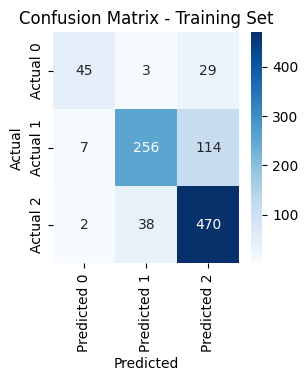

Test Accuracy: 0.76


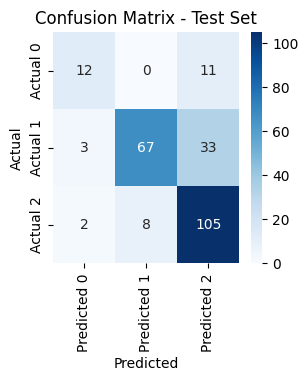

Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.52      0.60        23
         Low       0.89      0.65      0.75       103
    Moderate       0.70      0.91      0.80       115

    accuracy                           0.76       241
   macro avg       0.77      0.70      0.72       241
weighted avg       0.79      0.76      0.76       241



In [ ]:
# Initialize the XGBoost classifier
best_xgb = XGBClassifier(
    max_depth=5,  # Set the best hyperparameters found from the GridSearchCV
    learning_rate=0.01,
    n_estimators=200
)

# Fit the model on the training data
best_xgb.fit(X_train, y_train)


accuracy_xgb = accuracy_score(y_test, y_pred)
# Define a function for evaluating and plotting confusion matrix
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train Accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Train Accuracy: {train_accuracy:.2f}")
    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, y_train_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training Set')
    plt.show()

    # Test Accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.2f}")
    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()
    # Classification Report
    class_report = classification_report(y_test, y_test_pred, target_names=['High', 'Low', 'Moderate'])
    print("Classification Report:")
    print(class_report)

# Evaluate and plot
evaluate_model(best_xgb, X_train, y_train, X_test, y_test)


**6.6 Guassian Process Classifier**

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.90      0.94      0.92       103
           2       0.90      0.90      0.90       115

    accuracy                           0.90       241
   macro avg       0.89      0.83      0.86       241
weighted avg       0.90      0.90      0.89       241

Training Accuracy: 0.9346


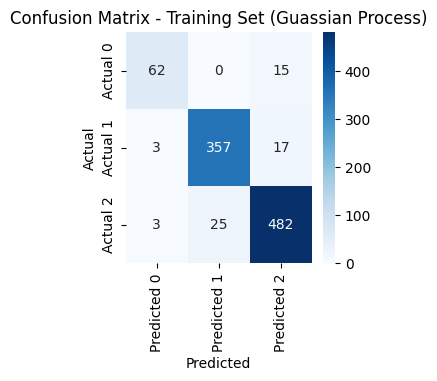

Test Accuracy: 0.8963


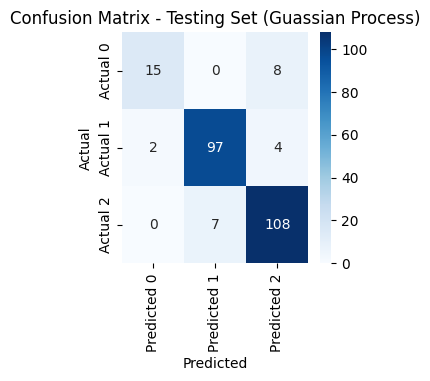

In [ ]:
# Initialize the Gaussian Process Classifier
kernel = 1.0 * RBF(length_scale=1.0)
gp_classifier = GaussianProcessClassifier(kernel=kernel, random_state=0)

# Fit the classifier
gp_classifier.fit(X_train_stand, y_train)

# Predict
y_pred = gp_classifier.predict(X_test_stand)

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate training accuracy
accuracy_gp = accuracy_score(y_train, gp_classifier.predict(X_train_stand))
print(f"Training Accuracy: {accuracy_gp:.4f}")

# Confusion Matrix for Training Set (Guassian Process)
cm_train_rf = confusion_matrix(y_train, gp_classifier.predict(X_train_stand))
plt.figure(figsize=(3, 3))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set (Guassian Process)')
plt.show()

# Confusion Matrix for Testing Set (Guassian Process)
# Test Accuracy
test_accuracy = accuracy_score(y_test, gp_classifier.predict(X_test_stand))
print(f"Test Accuracy: {test_accuracy:.4f}")

cm_test_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set (Guassian Process)')
plt.show()

**6.7 Gaussian Naive Bayes Classifier**

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        23
           1       0.73      0.60      0.66       103
           2       0.66      0.77      0.71       115

    accuracy                           0.68       241
   macro avg       0.67      0.65      0.65       241
weighted avg       0.69      0.68      0.68       241

Accuracy (Gaussian Naive Bayes): 0.6805


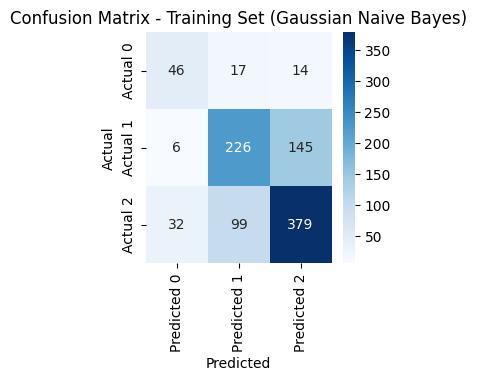

Test Accuracy: 0.6805


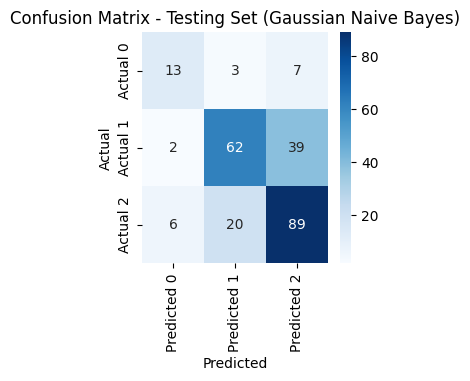

In [ ]:
# Initialize the Multinomial Naive Bayes Classifier
gnb = GaussianNB()

# Fit the classifier
gnb.fit(X_train_stand, y_train)

# Predict
y_pred_gnb = gnb.predict(X_test_stand)

# Print classification report
print(classification_report(y_test, y_pred_gnb))

# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy (Gaussian Naive Bayes): {accuracy_gnb:.4f}")

# Confusion Matrix for Training Set (Multinomial Naive Bayes)
cm_train_gnb = confusion_matrix(y_train, gnb.predict(X_train_stand))
plt.figure(figsize=(3, 3))
sns.heatmap(cm_train_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set (Gaussian Naive Bayes)')
plt.show()

# Test Accuracy
test_accuracy = accuracy_score(y_test, gnb.predict(X_test_stand))
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix for Testing Set (Gaussian Naive Bayes)
cm_test_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_test_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set (Gaussian Naive Bayes)')
plt.show()

**6.8 SVC**

Accuracy: 0.7230


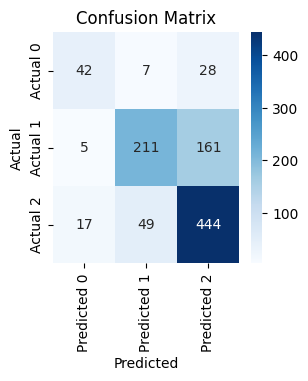

              precision    recall  f1-score   support

        High       0.66      0.55      0.60        77
         Low       0.79      0.56      0.66       377
    Moderate       0.70      0.87      0.78       510

    accuracy                           0.72       964
   macro avg       0.72      0.66      0.68       964
weighted avg       0.73      0.72      0.71       964

Accuracy: 0.7137


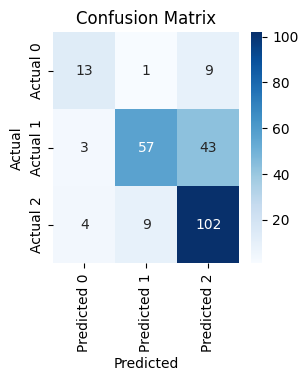

              precision    recall  f1-score   support

        High       0.65      0.57      0.60        23
         Low       0.85      0.55      0.67       103
    Moderate       0.66      0.89      0.76       115

    accuracy                           0.71       241
   macro avg       0.72      0.67      0.68       241
weighted avg       0.74      0.71      0.71       241



In [ ]:
# Initialize the SVC classifier
svc = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svc.fit(X_train, y_train)

# Predict on the training set
y_pred_train = svc.predict(X_train)

# Predict on the test set
y_pred_test = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred)
# Define a function for evaluating and plotting confusion matrix
def evaluate_model(classifier, X, y):
    # Accuracy
    accuracy = accuracy_score(y, classifier.predict(X))
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y, classifier.predict(X))
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(y, classifier.predict(X), target_names=['High', 'Low', 'Moderate'])
    print(report)

# Evaluate and plot for training set
evaluate_model(svc, X_train, y_train)

# Evaluate and plot for testing set
evaluate_model(svc, X_test, y_test)


**6.9 Ensemble Method**

Training Set:
Accuracy: 0.9108
Confusion Matrix:
[[ 47   5  25]
 [  0 344  33]
 [  0  23 487]]


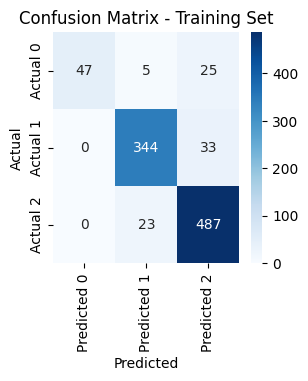

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.61      0.76        77
         Low       0.92      0.91      0.92       377
    Moderate       0.89      0.95      0.92       510

    accuracy                           0.91       964
   macro avg       0.94      0.83      0.87       964
weighted avg       0.91      0.91      0.91       964


Testing Set:
Accuracy: 0.8921
Confusion Matrix:
[[ 12   1  10]
 [  0  92  11]
 [  0   4 111]]


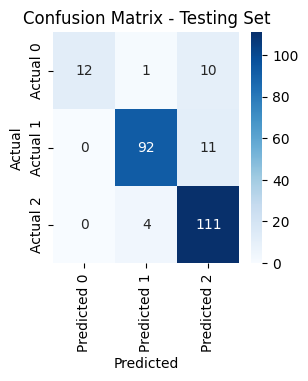

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.52      0.69        23
         Low       0.95      0.89      0.92       103
    Moderate       0.84      0.97      0.90       115

    accuracy                           0.89       241
   macro avg       0.93      0.79      0.83       241
weighted avg       0.90      0.89      0.89       241



In [ ]:

# Initialize base classifiers
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
lr_classifier = LogisticRegression(max_iter=1500, random_state=42)

# Create a Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('gradient_boosting', gb_classifier),
    ('logistic_regression', lr_classifier)
], voting='soft')  # 'soft' for probabilities

# Fit the Voting Classifier
ensemble.fit(X_train, y_train)

# Training Set Evaluation
train_pred = ensemble.predict(X_train)
accuracy_train_ensemble = accuracy_score(y_train, train_pred)

print("Training Set:")
print(f"Accuracy: {accuracy_train_ensemble:.4f}")

cm_train = confusion_matrix(y_train, train_pred)
print("Confusion Matrix:")
print(cm_train)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

report_train = classification_report(y_train, train_pred, target_names=['High', 'Low', 'Moderate'])
print("Classification Report:")
print(report_train)

# Testing Set Evaluation
test_pred = ensemble.predict(X_test)
accuracy_test_ensemble = accuracy_score(y_test, test_pred)

print("\nTesting Set:")
print(f"Accuracy: {accuracy_test_ensemble:.4f}")

cm_test = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:")
print(cm_test)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()

report_test = classification_report(y_test, test_pred, target_names=['High', 'Low', 'Moderate'])
print("Classification Report:")
print(report_test)


**6.10 AdaBoost**

Training Accuracy (AdaBoost): 0.6961
Testing Accuracy (AdaBoost): 0.6929


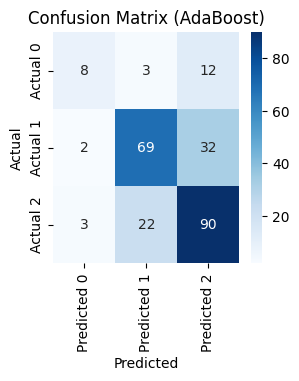

Training Accuracy (Random Forest): 0.9346
Testing Accuracy (Random Forest): 0.9129


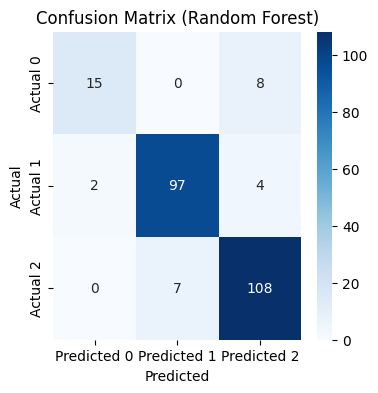

In [ ]:
# Create a base classifier (usually a decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Training Accuracy for AdaBoost
accuracy_train_adaboost = accuracy_score(y_train, adaboost_classifier.predict(X_train))
print(f"Training Accuracy (AdaBoost): {accuracy_train_adaboost:.4f}")

# Testing Accuracy for AdaBoost
accuracy_test_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Testing Accuracy (AdaBoost): {accuracy_test_adaboost:.4f}")

# Confusion Matrix for AdaBoost
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Training Accuracy for Random Forest
accuracy_train_rf = accuracy_score(y_train, rf_classifier.predict(X_train))
print(f"Training Accuracy (Random Forest): {accuracy_train_rf:.4f}")

# Testing Accuracy for Random Forest
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)
print(f"Testing Accuracy (Random Forest): {accuracy_test_rf:.4f}")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


**6.11 CatBoost**

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0427405	test: 1.0457071	best: 1.0457071 (0)	total: 48.3ms	remaining: 1m 12s
200:	learn: 0.2476909	test: 0.3391673	best: 0.3391673 (200)	total: 380ms	remaining: 2.45s
400:	learn: 0.1899968	test: 0.2833287	best: 0.2833287 (400)	total: 716ms	remaining: 1.96s
600:	learn: 0.1721092	test: 0.2675748	best: 0.2675382 (598)	total: 1.09s	remaining: 1.63s
800:	learn: 0.1633320	test: 0.2573971	best: 0.2573971 (800)	total: 1.43s	remaining: 1.25s
1000:	learn: 0.1586925	test: 0.2527907	best: 0.2527560 (999)	total: 1.76s	remaining: 880ms
1200:	learn: 0.1551028	test: 0.2487217	best: 0.2487217 (1200)	total: 2.15s	remaining: 536ms
1400:	learn: 0.1524761	test: 0.2452959	best: 0.2451580 (1396)	total: 2.5s	remaining: 176ms
1499:	learn: 0.1513636	test: 0.2437858	best: 0.2437858 (1499)	total: 2.66s	remaining: 0us

bestTest = 0.2437857689
bestIteration = 1499

Accuracy (Training Set): 0.9346


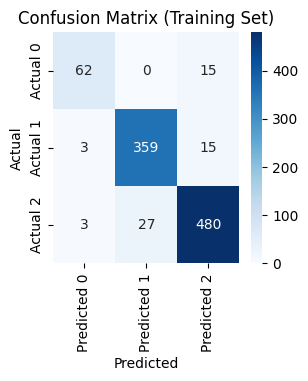

Accuracy (Test Set): 0.9004


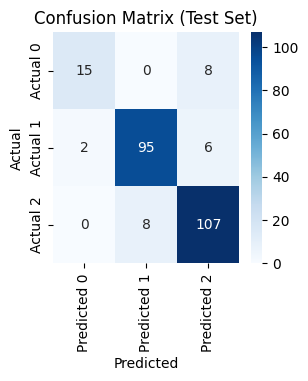

In [ ]:
# Initialize the CatBoost Classifier
catboost_classifier = CatBoostClassifier(iterations=1500, depth=6, learning_rate=0.1, verbose=200, random_state=42)

# Train the CatBoost classifier
catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, plot=True)

accuracy_catboost = accuracy_score(y_test, y_pred)
# Define a function to evaluate and plot confusion matrix
def evaluate_catboost(classifier, X, y, dataset_name):
    # Predict
    y_pred = classifier.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy ({dataset_name}): {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()

# Evaluate and plot for training set
evaluate_catboost(catboost_classifier, X_train, y_train, "Training Set")

# Evaluate and plot for test set
evaluate_catboost(catboost_classifier, X_test, y_test, "Test Set")

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

**6.12 Applying Differnt Neural Newtork Model**

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=X_train_stand.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for adaptivity level

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_stand, y_train, epochs=100, batch_size=32, validation_data=(X_test_stand, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_stand, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100
31/31 [==============================] - 1s 10ms/step - loss: 1.0191 - accuracy: 0.4844 - val_loss: 0.8751 - val_accuracy: 0.6763
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8252 - accuracy: 0.6649 - val_loss: 0.7592 - val_accuracy: 0.6929
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7148 - accuracy: 0.7116 - val_loss: 0.6818 - val_accuracy: 0.7386
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.7386 - val_loss: 0.6284 - val_accuracy: 0.7676
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5959 - accuracy: 0.7521 - val_loss: 0.5866 - val_accuracy: 0.7718
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7635 - val_loss: 0.5584 - val_accuracy: 0.7801
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.7915 - val_loss: 0.5250 - val_accuracy: 0.8216
Epoch 8/100


**6.13 Training and Validation**

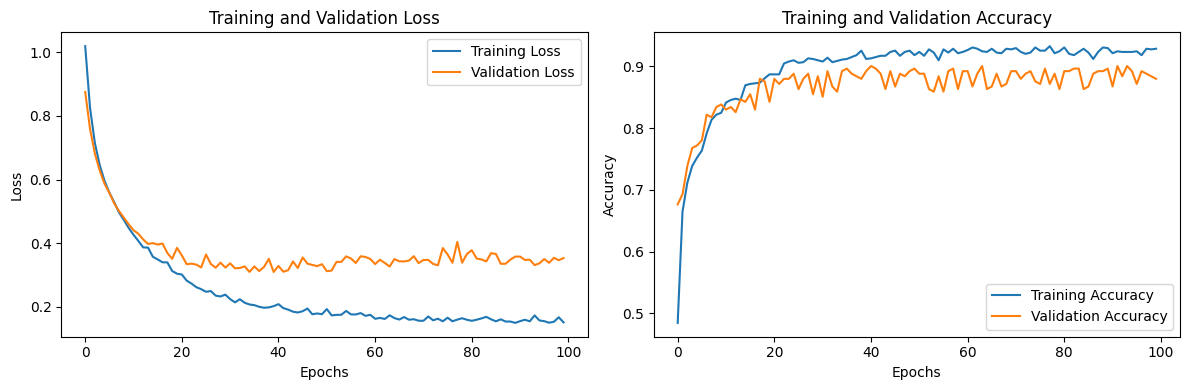

In [ ]:

# Extract the training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot training loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


# **7. Comparison accuracy between each model**

In [ ]:

# Define the models and their corresponding accuracies
models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "K-Nearest Neighbors",
    "XGBoost",
    "Gaussian Process",
    "Gaussian Naive Bayes",
    "Support Vector Machine",
    "Ensemble",
    "AdaBoost",
    "CatBoost",
    "Neural Network"
]

accuracies = [
    accuracy_log_reg,
    accuracy_dt_best,
    accuracy_rf,
    accuracy_knn,
    accuracy_xgb,
    accuracy_gp,
    accuracy_gnb,
    accuracy_svc,
    accuracy_test_ensemble,
    accuracy_train_adaboost,
    accuracy_catboost,
    accuracy
]

# Create a DataFrame
comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,

})

# Display the DataFrame
print(comparison_df)

                     Model  Accuracy
0      Logistic Regression  0.688797
1            Decision Tree  0.688797
2            Random Forest  0.912863
3      K-Nearest Neighbors  0.688797
4                  XGBoost  0.688797
5         Gaussian Process  0.934647
6     Gaussian Naive Bayes  0.680498
7   Support Vector Machine  0.896266
8                 Ensemble  0.892116
9                 AdaBoost  0.696058
10                CatBoost  0.896266
11          Neural Network  0.879668
